# Week 4 Lab - Hypothesis Testing

 This week's assignment will give you some practice defining and testing a hypothesis.

## Our Dataset: 
**Dataset Name:** ToothGrowth.csv (locted in the assign_wk4 folder)<br>
The tooth growth dataset describes the length of the odontoblasts (teeth) in each of 10 guinea pigs at three Vitamin C dosage levels (0.5, 1, and 2 mg) with two delivery methods (orange juice or ascorbic acid).

The file contains 60 observations of 3 variables <br>
len : Tooth length <br>
supp : Supplement type (VC or OJ)<br>
dose : Dose in milligrams<br>


# Assignment Requirements

Hypothesis testing for the given dataset. Your analysis should include the following:
   1. Graphically describe the dataset
      - This could include box plots, histograms, etc.
      - Provide a summary of your initial findings about the dataset.
   2. Check of data normality, using both methods
      - Graphically  check for normality
      - Statistical test for normality
   3. Defined a null and alternative hypothesis (Ho and Ha) for the dataset
      - Be specific and clear in your definitions
   4. Hypothesis testing 
      - Explain why you chose the test(s) you are using
      - Summarize your findings from the test(s) you performed
   5. Conclusion based on your analysis
      - Be sure to defend your conclusion. Include supporting information for your analysis.
   6. Refine your initial hypothesis and repeat steps 3 through 5
      - How did the outcome(s) change between your original Ho/Ha and your refined Ho/Ha?

**Important:** Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

## I. Introduction

This weeks analysis is on the tooth growth of guinea pigs when given specific doses, and types of supplements for vitamin C. In particular we are interested in identifying a null hypothesis, writing an alternative hypothesis, testing that hypothesis and refining the hypothesis using the statistical tests available to us.

The datasets for this week are provided in ToothGrowth.csv and are described in the section "Our Dataset".

## II. Methods/Code, III. Results/Output, IV. Analysis of Results

### Setup
---

The process for getting our analysis setup will be to setup our plots to inline, import the necessary python packages, look over our csv, and import the csv into a dataframe.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats
import seaborn as sns

In [2]:
!head assign_wk4/ToothGrowth.csv

"","len","supp","dose"
"1",4.2,"VC",0.5
"2",11.5,"VC",0.5
"3",7.3,"VC",0.5
"4",5.8,"VC",0.5
"5",6.4,"VC",0.5
"6",10,"VC",0.5
"7",11.2,"VC",0.5
"8",11.2,"VC",0.5
"9",5.2,"VC",0.5


In [3]:
teeth_df = pd.read_csv('assign_wk4/ToothGrowth.csv', index_col=0)
teeth_df

,len,supp,dose
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5
7,11.2,VC,0.5
8,11.2,VC,0.5
9,5.2,VC,0.5
10,7.0,VC,0.5


In [4]:
# Split sets for hypothesis testing

def split_dose_df(df, ref):
    categories = df[ref].value_counts().index
    a_df = df[df[ref] == categories[0]]
    b_df = df[df[ref] == categories[1]]
    c_df = df[df[ref] == categories[2]]
    return a_df, b_df, c_df

low_df, med_df, high_df = split_dose_df(teeth_df, 'dose')

In [5]:
def split_supp_df(df, ref):
    categories = df[ref].value_counts().index
    a_df = df[df[ref] == categories[0]]
    b_df = df[df[ref] == categories[1]]
    return a_df, b_df

vc_df, oj_df = split_supp_df(teeth_df, 'supp')

<section id='missing'></section>

### Question 1: Graphically describe the dataset

---

- **This could include box plots, histograms, etc.**

We will start by seeing how this dataset is distributed for tooth length, since it appears that this dataset is observations where we are change vitamin c dose, and supplement type to assess the effect on tooth length.

<AxesSubplot:xlabel='len'>

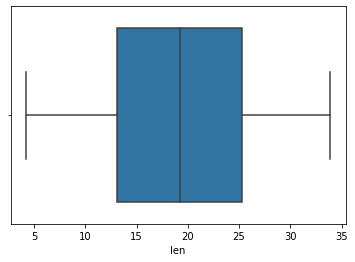

In [6]:
# Show a boxplot of the tooth length of dataset

sns.boxplot(x=teeth_df['len'])

<AxesSubplot:>

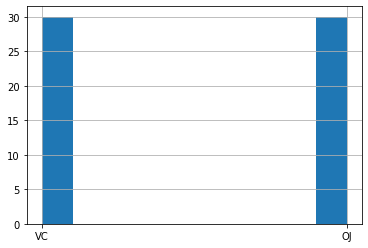

In [7]:
# Show the distribution of supplementation sources in this dataset

teeth_df['supp'].hist()

<AxesSubplot:>

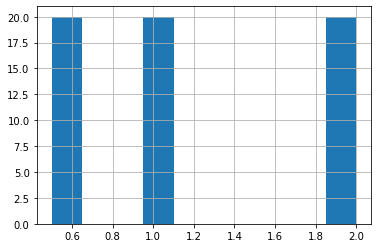

In [8]:
# Show the distribution of doses in this dataset

teeth_df['dose'].hist()

It looks like we have 60 total observations, with 20 each at dose 0.5, 1.0, and 2.0 as well as split in half between OJ and VC supplementations.

<AxesSubplot:xlabel='dose', ylabel='len'>

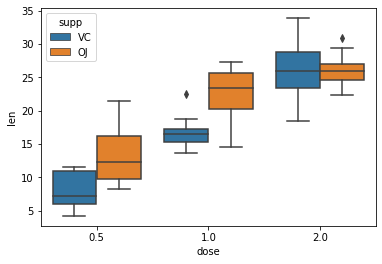

In [9]:
sns.boxplot(x=teeth_df['dose'], y=teeth_df['len'], hue=teeth_df['supp'])

From these visualizations it looks like we will want to test hypothesis as to whether or not dose influences tooth length, and if the supplementation substrate matters.

- **Provide a summary of your initial findings about the dataset.**

I am going to display the summary statistics for the dataset, as well as the subsets off of the dose and supplement categories that we have displayed in the previous section.

In [10]:
teeth_df.describe()

,len,dose
count,60.000000,60.000000
mean,18.813333,1.166667
std,7.649315,0.628872
min,4.200000,0.500000
25%,13.075000,0.500000
50%,19.250000,1.000000
75%,25.275000,2.000000
max,33.900000,2.000000


In [11]:
vc_df.describe()

,len,dose
count,30.000000,30.000000
mean,16.963333,1.166667
std,8.266029,0.634270
min,4.200000,0.500000
25%,11.200000,0.500000
50%,16.500000,1.000000
75%,23.100000,2.000000
max,33.900000,2.000000


In [12]:
oj_df.describe()

,len,dose
count,30.000000,30.000000
mean,20.663333,1.166667
std,6.605561,0.634270
min,8.200000,0.500000
25%,15.525000,0.500000
50%,22.700000,1.000000
75%,25.725000,2.000000
max,30.900000,2.000000


In [13]:
low_df.describe()

,len,dose
count,20.000000,20.0
mean,10.605000,0.5
std,4.499763,0.0
min,4.200000,0.5
25%,7.225000,0.5
50%,9.850000,0.5
75%,12.250000,0.5
max,21.500000,0.5


In [14]:
med_df.describe()

,len,dose
count,20.000000,20.0
mean,19.735000,1.0
std,4.415436,0.0
min,13.600000,1.0
25%,16.250000,1.0
50%,19.250000,1.0
75%,23.375000,1.0
max,27.300000,1.0


In [15]:
high_df.describe()

,len,dose
count,20.00000,20.0
mean,26.10000,2.0
std,3.77415,0.0
min,18.50000,2.0
25%,23.52500,2.0
50%,25.95000,2.0
75%,27.82500,2.0
max,33.90000,2.0


From our visual look at data, and the experiment that we are observing we are likely wanting to determine if there is a difference between the various sample categories and looking at our summary statistics confirms that there is likely some significant differences between the various treament groups.

### Question 2: Check for data normality, using both methods

---

- **Graphically check for normality**

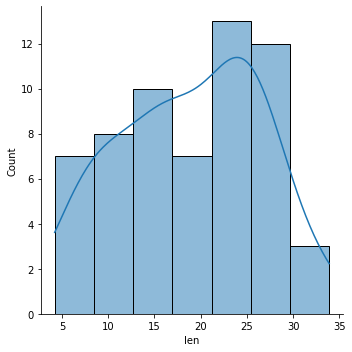

In [16]:
# adapted command from 4_Hypothesis_Testing at https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152278/View
# histogram plot - the kde argument adds the line to show the general shape of the distribution

sns.displot(teeth_df['len'],kde=True)

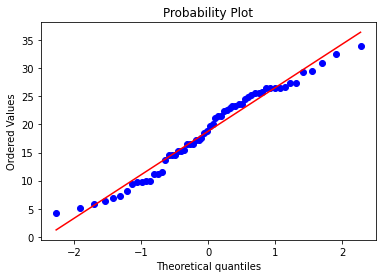

In [17]:
# adapted command from 4_Hypothesis_Testing at https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152278/View

res = stats.probplot(teeth_df['len'], plot=plt)

The results of our probplot show that we are very close to a normal distribution, and when combined with the small sample size of our dataset I think we can safetly say that this distribution "looks" normal.

- **Statistical test for normality**

In [18]:
# adapted command from 4_Hypothesis_Testing at https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152278/View
from scipy.stats import shapiro

# normality test
stat, p = shapiro(teeth_df['len'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=0.967, p=0.109
Sample looks normally distributed (fail to reject H0)


In [19]:
# adapted command from 4_Hypothesis_Testing at https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152278/View
from scipy.stats import normaltest

# normality test
stat, p = normaltest(teeth_df['len'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks normally distributed (fail to reject H0)')
else:
    print('Sample does not look normally distributed (reject H0)')

Statistics=6.490, p=0.039
Sample does not look normally distributed (reject H0)


In [20]:
# adapted command from 4_Hypothesis_Testing at https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152278/View

print(f'Skewness: {teeth_df["len"].skew()}')
print(f'Kurtosis: {teeth_df["len"].kurt()}')

Skewness: -0.14995189829252065
Kurtosis: -0.9549824842435792


Similar to our visual evaluation of the distribution we have a mix between our methods on whether the dataset is normally distributed or not. With the small sample size and the mix we are seeing I think that we can safetly assume that the dataset is normal.

### Question 3: Define a null and alternative hypothesis (${H_0}$ and ${H_a}$) for the dataset
---
- **Be specific and clear in your definitions**

Defining the our hypothesis:

${H_0}$
*= If we change the vitamin C dose given to our guinea pig sample, then tooth length will remain the same.*
<br>
${H_0 = \bar{x}_1 = \bar{x}_2 = \bar{x}_3}$

${H_\alpha}$
*= If we change the vitamin C dose given to our guinea pig sample, then tooth length will not remain the same.*
<br>
${H_\alpha = \bar{x}_1 \neq \bar{x}_2 \neq \bar{x}_3}$
<br>
<br>
${\alpha = 0.05}$

### Question 4:  Hypothesis Testing
---
- **Explain why you chose the test(s) you are using**

In testing our hypothesis we are going to need to use the t-test due to the small sample sizes. We are going to want to use the two sample approach to using the t-test because we will be comparing two samples to determine if there is a difference between them.

T-Test Assumptions:
1. The data is continuous.
2. The data is a simple random sample.
3. The data is normally distributed.
4. The data has homogeneity of variance.

**Hypothesis:**

In [21]:
# We are comparing to our confidence value a lot so I am pulling this out into a function for this section

def compare_alpha(res):
    alpha = 0.05
    if res <= alpha:
        print('Reject the null hypothesis')
    else:
        print('Failed to reject the null hypothesis')
        
# F-test function
# adapted code for f_test from https://www.statology.org/f-test-python/

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)
    dfn = x.size-1
    dfd = y.size-1
    p = 1-stats.f.cdf(f, dfn, dfd)
    return f, p

In [22]:
# Validating our assumption of homogeneity of variance using the f-test

f, p = f_test(low_df['len'], med_df['len'])
compare_alpha(p)

Failed to reject the null hypothesis


In [23]:
f, p = f_test(med_df['len'], high_df['len'])
compare_alpha(p)

Failed to reject the null hypothesis


In [24]:
f, p = f_test(low_df['len'], high_df['len'])
compare_alpha(p)

Failed to reject the null hypothesis


Because we were unable to reject the null hypothesis on the F-test we can continue with the assumption that our data satisfies the homogeneity of variance.

In [25]:
# Independent Samples T-test on split df lengths to determine if the means vary significantly from eachother

s, p = stats.ttest_rel(low_df['len'], med_df['len'])

In [26]:
print(f'T-test Statistic: {s}')
print(f'T-test P-value: {p}')
print(f'Dose 0.5 Mean: {low_df["len"].mean()}')
print(f'Dose 1.0 Mean: {med_df["len"].mean()}')
compare_alpha(p)

T-test Statistic: -6.966880729531586
T-test P-value: 1.2254366960807943e-06
Dose 0.5 Mean: 10.604999999999999
Dose 1.0 Mean: 19.735000000000003
Reject the null hypothesis


In [27]:
s, p = stats.ttest_rel(med_df['len'], high_df['len'])

In [28]:
print(f'T-test Statistic: {s}')
print(f'T-test P-value: {p}')
print(f'Dose 1.0 Mean: {med_df["len"].mean()}')
print(f'Dose 2.0 Mean: {high_df["len"].mean()}')
compare_alpha(p)

T-test Statistic: -4.604646811976588
T-test P-value: 0.00019341860475191383
Dose 1.0 Mean: 19.735000000000003
Dose 2.0 Mean: 26.1
Reject the null hypothesis


In [29]:
s, p = stats.ttest_rel(low_df['len'], high_df['len'])

In [30]:
print(f'T-test Statistic: {s}')
print(f'T-test P-value: {p}')
print(f'Dose 0.5 Mean: {low_df["len"].mean()}')
print(f'Dose 2.0 Mean: {high_df["len"].mean()}')
compare_alpha(p)

T-test Statistic: -11.29149376779477
T-test P-value: 7.190254502934541e-10
Dose 0.5 Mean: 10.604999999999999
Dose 2.0 Mean: 26.1
Reject the null hypothesis


Conclusion: In all three cases, comparing dose = 0.5, 1.0, and 2.0 we can reject the null hypothesis that these samples could be the same by random chance.

- **Summarize your findings from the test(s) you performed**

We started both hypothesis tests with an F-test to ensure that we could assume homogeneity of variance, then we performed a T-tests on each sample and compared the calculated P-value to our alpha to determine our confidence level when rejecting the null hypothesis. We were able to reject the null hypothesis that the mean value of samples divided by dose would be the same with a 95% confidence. We were also unable to reject the null hypothesis that the mean value of samples divided supplement type were the same at the 95% confidence level.

### Question 5: Conclusion based on your analysis

***

- **Be sure to defend your conclusion. Include supporting information for your analysis.**

Our tests were both two sample T-tests comparing samples split along a categorical variable, after validating the T-test assumptions from our previous work and failing to reject the null hypothesis of an F-test. The T-test was chosen due to the small sample sizes we are working with, and that we are looking for differences between various sample categories. From our hypothesis testing we found that we could reject the null hypothesis that dose does not effect the tooth length. We came to this conclusion by calculating the p-value and T-statistic for each sample set and comparing the p-value to our alpha of 0.05 for a 95% confidence in our conclusion.
<br><br>
**Hypothesis Results:**
<br>
T-test Statistic: -6.966880729531586<br>
T-test P-value: 1.2254366960807943e-06<br>
Dose 0.5 Mean: 10.604999999999999<br>
Dose 1.0 Mean: 19.735000000000003<br>
Reject the null hypothesis<br>
<br>
T-test Statistic: -4.604646811976588<br>
T-test P-value: 0.00019341860475191383<br>
Dose 1.0 Mean: 19.735000000000003<br>
Dose 2.0 Mean: 26.1<br>
Reject the null hypothesis<br>
<br>
T-test Statistic: -11.29149376779477<br>
T-test P-value: 7.190254502934541e-10<br>
Dose 0.5 Mean: 10.604999999999999<br>
Dose 2.0 Mean: 26.1<br>
Reject the null hypothesis<br>
<br>
Not only are our P-values below our 0.05 threshold we can see large negative T-statistics implying a high level of reproducability and direction.

### Question 6: Refine your initial hypothesis and repeat steps 3 through 5

***

Step 3 - Defining the refined hypothesis:

${H_0}$
*= If we change the vitamin C dose given to our guinea pig sample, then tooth length will not remain the same.*
<br>
${H_\alpha = \bar{x}_1 \neq \bar{x}_2 \neq \bar{x}_3}$

${H_\alpha}$
*= If we increase the vitamin C dose given to our guinea pig sample, then tooth length will increase or remain the same.*
<br>
${H_\alpha = \bar{x}_1 \le \bar{x}_2 \le \bar{x}_3}$
<br>
<br>
${\alpha = 0.05}$

In [34]:
# Step 4 - Testing the hypothesis
# Compare the means of each category and see if they hold to the alternative hypothesis

x_bar_1 = low_df['len'].mean()
x_bar_2 = med_df['len'].mean()
x_bar_3 = high_df['len'].mean()

In [35]:
x_bar_1 <= x_bar_2

True

In [36]:
x_bar_2 <= x_bar_3

True

interval columns not set, guessing: ['len', 'dose']


<AxesSubplot:>

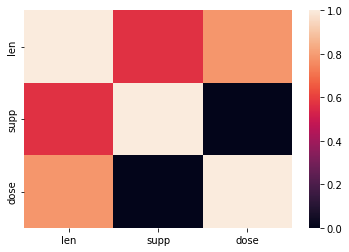

In [40]:
# Sanity check looking at the correlations and heat map

sns.heatmap(teeth_df.phik_matrix())

In [38]:
teeth_df.corr()

,len,dose
len,1.000000,0.802691
dose,0.802691,1.000000


- **How did the outcome(s) change between your original Ho/Ha and your refined Ho/Ha?**

Step 5 - Conclusion
<br><br>
In refining this hypothesis I made a few assumptions which I am not sure if I have sufficiently supported. My logic is that I have sufficiently supported that each category is different about the mean in a statistically reproducable way with a 95% confidence. Then, I made the assumption that I can then say that if the means of the samples have an order to mean values then I can further refine my hypothesis with that order. I was not able to find a good source that did more than hand wave this step so I put it in like this so that we can discuss if I am incorrect.
<br><br>
The refined hypothesis should then be supported by our assumptions, F-test, T-test, and the order found in the means of the samples. We should then be able to conclude that giving our guinea pigs higher doses of vitamin C, from 0.5mg to 2.0mg, will result in a higher tooth length corresponding to the higher doseage.

## V. Conclusion

From the above analysis we can conclude that the null hypothesis that the dose of vitamin C is unrelated to the tooth length in our guinea pigs can be rejected. This was shown by first satisfying the assumptions we need to use the Students T-test for related samples. Specifically that our data is continuous, that the sample selection is a simple random sample, that our data is normally distributed (confirmed visually on the QQ-plot and empirically with the Shapiro-Wilk test), and that our data has homogeneity of variance (confirmed using the F-test). We then performed our T-test on each sample to each other sample and found that our P-values of 1.2254366960807943e-06, 0.00019341860475191383, and 7.190254502934541e-10 were all less than our alpha value of 0.05 giving us a 95% confidence in rejecting the null hypothesis. The alternative hypothesis that dose of vitamin C is related to tooth length was then further refined by showing the order of the means of each sample. We assumed that this correctly refines the hypothesis, per the previous section, and now reads that if we increase the dose of vitamin C to our guinea pigs, then the tooth length will increase or stay the same.

## VI. References

MSDS 650 - Week 4 Content:


1.) __[From the Experts: Inferential Statistics](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152283/View)__

2.) __[Week 4: Hypothesis Testing](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152278/View)__

3.) __[Week 4 Assignment](https://worldclass.regis.edu/d2l/le/content/285076/viewContent/4152276/View)__

4.) __[How to Perform an F-Test in Python](https://www.statology.org/f-test-python/)__
 